In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# About Dataset
# The Swiggy Restaurant Dataset is a comprehensive collection of data related to restaurants available on the Swiggy food delivery platform.
# This dataset provides valuable information about various aspects of restaurants, enabling users to explore, analyze, and gain insights into the restaurant landscape on Swiggy.



# BASIC DATA ANALYSIS

In [19]:
data=pd.read_csv('/kaggle/input/swiggy-dataset/swiggy.csv')
data.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [20]:
data.shape

(8680, 10)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.2+ KB


In [22]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [23]:
data.isnull().sum()    #no null values

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [24]:
data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [25]:
data.City.unique()     #we can see we have  'Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi','Chennai', 'Ahmedabad', 'Surat'

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

In [26]:
data.Area.unique()

array(['Koramangala', 'Jogupalya', 'Indiranagar', 'Domlur', 'Cooke Town',
       'Pulikeshi Nagar', 'Sivanchetti Gardens', 'Kodihalli', 'Jayanagar',
       'Film Nagar', 'Banashankari', 'Masab Tank', 'Banjara Hills',
       'Andheri East', 'Powai', 'Punjagutta', 'Aundh', 'Baner',
       'Powai Area', 'Ramgopalpet', 'Kalasiguda', 'Adarsh Nagar',
       'Himayatnagar', 'Ashok Nagar', 'Commercial Street',
       'Richmond Town', 'Vasanth Nagar', 'Bhowanipore', 'Ballygunge',
       'Gariahat', 'Kalighat', 'Sion', 'Mumbai', 'Rajajinagar', 'Golpark',
       'Shivajinagar', 'Koregaon Park', 'Deccan Gymkhana', 'Karkhana',
       'Kothrud', 'Erandwane', 'Koti', 'Dilsukhnagar', 'Nagole',
       'Chandrapuri Colony', 'Kothapet', 'Narayanguda', 'Fc Road',
       'Park Street Area', 'Beniapukur', 'Bidhannagar', 'New Nallakunta',
       'Adikmet', 'Amberpet', 'Karve Nagar', 'Agarkar Nagar', 'Mundhwa',
       'Mohammed Wadi', 'Bandra Area', 'Paschim Vihar', 'Malleshwaram',
       'Lakdikapul', 'Camp'

# TOP 10 AREAS WITH MOST RESTAURANTS

In [27]:
top_10_areas = data['Area'].value_counts().head(10)
fig = px.bar(top_10_areas, x=top_10_areas.index, y=top_10_areas.values, title='Top 10 Areas with Most Restaurants')

fig.update_xaxes(title_text='Area', title_font_color='white')  
fig.update_yaxes(title_text='Number of Restaurants', title_font_color='white')  

fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

# Average Food Price Of Different City

In [28]:
data_city=data.groupby('City')['Price'].mean().sort_values(ascending=False)
fig=px.bar(data_city,x=data_city.index,y=data_city.values,title="Average Food Price Of Each City")
fig.update_xaxes(title_text='City', title_font_color='white')  
fig.update_yaxes(title_text='Mean Food Price', title_font_color='white')  

fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()             #MUMBAI HAS THE HIGHEST MEAN FOOD PRICE

# DISTRIBUTION OF PRICE 

In [29]:
fig=px.histogram(data,x=data['Price'])
fig.update_xaxes(title_text='Price', title_font_color='white')  
fig.update_yaxes(title_text='Distribution', title_font_color='white')  
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

# DISTRIBUTION OF DELIVERY TIMINGS

In [30]:
fig=px.histogram(data,x=data['Delivery time'])
fig.update_xaxes(title_text='Delivery Time in Minutes', title_font_color='white')  
fig.update_yaxes(title_text='Count', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

# is there a correlation between the price of food items and their average ratings?

In [31]:
fig = px.scatter(data, x='Price', y="Avg ratings",title="Average Rating V/S Price")
fig.update_xaxes(title_text='Price', title_font_color='white')  
fig.update_yaxes(title_text='Average Rating', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()                                                    # We do not see a very strong positive correlation but this tells us people tend to give higher rating in affordable prices

# What is the relationship between total ratings and average ratings? Does a higher number of ratings correlate with higher or lower average ratings?

In [32]:
fig = px.scatter(data, x='Avg ratings', y="Total ratings",title="Average Rating V/S Total Ratings")
fig.update_xaxes(title_text='Average Ratings', title_font_color='white')  
fig.update_yaxes(title_text='Total Rating', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()

In [33]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(data['Avg ratings'], data['Total ratings'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')    

Pearson correlation coefficient: 0.15790032898975878
p-value: 1.4251296658980039e-49


# WHAT ARE THE POPULAR FOOD TYPES IN EVERY CITY

In [34]:
popular_food_types = data.groupby(['City', 'Food type'])['ID'].count().reset_index()
popular_food_types = popular_food_types.sort_values(by=['City', 'ID'], ascending=[True, False])
popular_food_types = popular_food_types.drop_duplicates(subset='City')

fig = px.bar(popular_food_types, x='City', y='ID', color='Food type',
             title='Most Popular Food Types Served by Swiggy Restaurants in Each City')

fig.update_xaxes(title_text='City', title_font=dict(color='white'))
fig.update_yaxes(title_text='Number of Restaurants', title_font=dict(color='white'))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font_color='white',
    title=dict(text='Most Popular Food Types Served by Swiggy Restaurants in Each City', font=dict(color='white'))
)

fig.show()

# How do the average ratings of restaurants compare across different cities?

In [35]:
data_avg_rating_city=data.groupby('City')['Avg ratings'].mean().sort_values(ascending=False)
data_avg_rating_city

City
Chennai      3.776311
Bangalore    3.762896
Hyderabad    3.701395
Kolkata      3.698811
Mumbai       3.599374
Ahmedabad    3.596513
Surat        3.580078
Pune         3.550183
Delhi        3.526350
Name: Avg ratings, dtype: float64

In [36]:
fig=px.bar(data_city,x=data_avg_rating_city.index,y=data_avg_rating_city.values,title="Average Ratings Of Each City")
fig.update_xaxes(title_text='City', title_font_color='white')  
fig.update_yaxes(title_text='Mean Rating', title_font_color='white')  

fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show() 

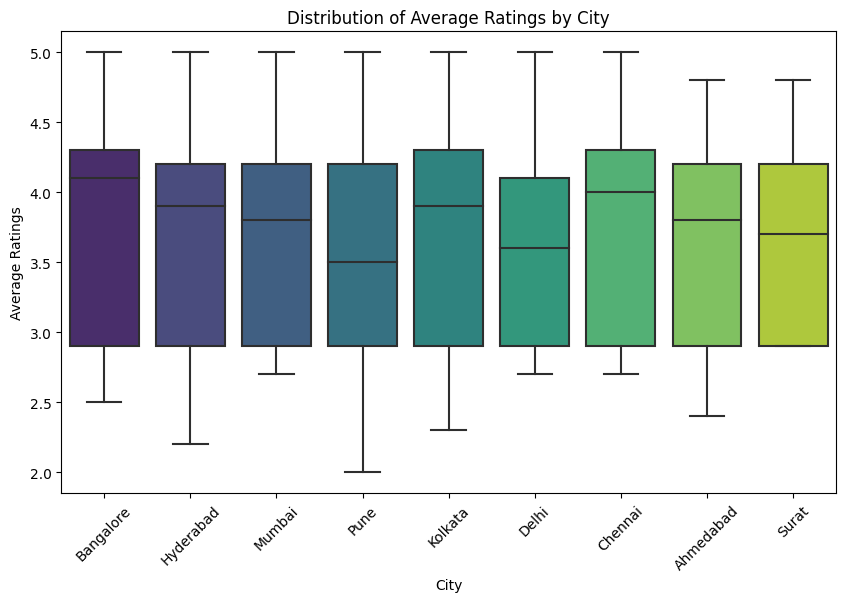

In [37]:
# Additional visualization: Box plot to see the distribution of ratings in each city
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Avg ratings', data=data, palette='viridis')
plt.title('Distribution of Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

In [38]:
above_45_ratings = data[data['Avg ratings'] > 4.5]
below_45_ratings = data[data['Avg ratings'] <= 4.5]
percentage_above_45 = (len(above_45_ratings) / len(data)) * 100
percentage_below_45 = 100 - percentage_above_45

rating_df = pd.DataFrame({'Rating': ['Above 4.5', '4.5 and Below'],
                          'Percentage': [percentage_above_45, percentage_below_45]})

fig = px.pie(rating_df, names='Rating', values='Percentage',
             title='Top Rated Swiggy Restaurants In Percentage ',
             hole=0.2,
            )
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')

fig.update_traces(pull=[0.3, 0])
fig.show()

In [39]:
above_45_ratings = data[data['Avg ratings'] > 4.5]
above_45_ratings['City'].value_counts()

City
Chennai      62
Kolkata      61
Mumbai       49
Pune         44
Bangalore    41
Ahmedabad    21
Hyderabad    18
Delhi        14
Surat        14
Name: count, dtype: int64

# How does delivery time vary across different Cities?

In [40]:
data_dt_city=data.groupby('City')['Delivery time'].mean().sort_values(ascending=False)    #KOLKATA HAS THE HIGHEST DELIVERY TIME


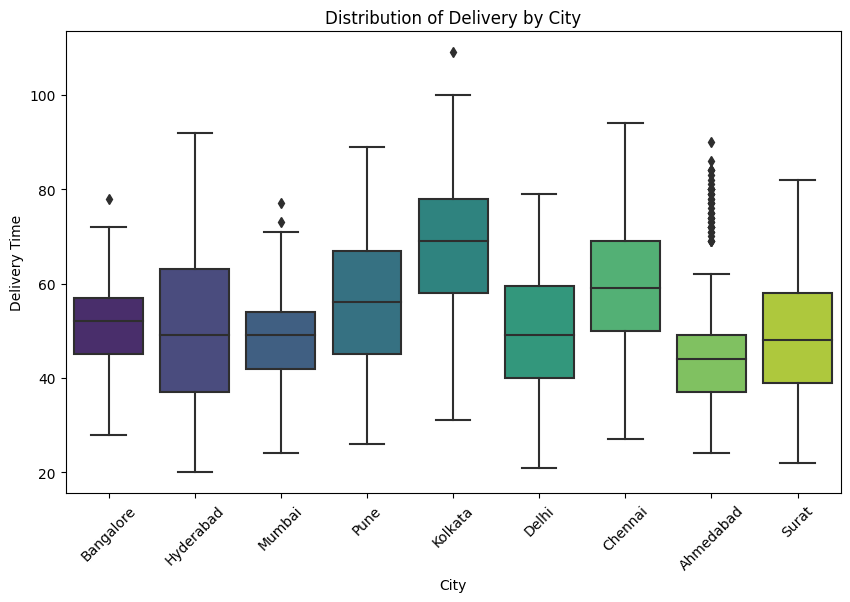

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Delivery time', data=data, palette='viridis')
plt.title('Distribution of Delivery by City')
plt.xlabel('City')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.show()

# we can see kolkata has the highest mean delivery time,Let's explore more
# DATA ANALYSIS OF CITY KOLKATA

In [42]:
data_kol=data[data['City']=='Kolkata']
print(data_kol['Delivery time'].max())
print(data_kol['Delivery time'].mean())                 # 109 is the maximum delivery time in Kolkata which is close to 2 hrs

109
67.80980683506687


In [43]:
data_kol[data_kol['Delivery time']==109]        # We can see the Address as Salt Lake and Area Kestopur

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
5327,422757,Kestopur,Kolkata,Heavens Kitchen,300.0,2.9,80,Indian,Salt Lake,109


In [44]:
data_kestopur=data_kol[data_kol['Area']=='Kestopur']           #Hence Heaven Kitchen's Delivery time is the highest,rest are okay

In [45]:
fig = px.scatter(data_kestopur, x='Avg ratings', y="Delivery time",title="Average Rating V/S Delivery Time in Kestopur")
fig.update_xaxes(title_text='Average Ratings', title_font_color='white')  
fig.update_yaxes(title_text='Delivery time', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()   

In [46]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(data_kestopur['Avg ratings'], data_kestopur['Delivery time'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')                                            
             #shows negative correlation hence lower avg rating might be because of greater delivery time

Pearson correlation coefficient: -0.39409188012562235
p-value: 0.16323256685691145


# AREAS IN KOLKATA WITH MEAN TIME GREATER THAN 67 MINUTES

In [47]:
data_kol1=data_kol[data_kol['Delivery time']>=67]
len(data_kol1['Area'].unique())  
data_kol1.head()                                                    #There are 82 restaurants having greater than 67 mins of delivery time

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
56,3007,Bhowanipore,Kolkata,Tandoori Darbar,500.0,4.4,100,"North Indian,Chinese,Tandoor,Biryani,Beverages...",Hazra Road,71
58,3018,Gariahat,Kolkata,Tero Parbon,500.0,4.3,100,Bengali,Purna Das Road Hindustan Park,72
59,3020,Ballygunge,Kolkata,Wise Owl The Coffee Shop,700.0,4.3,100,"Continental,American,Cafe",Purnadas Road,76
60,3022,Gariahat,Kolkata,Aminia Restaurant- Golpark,500.0,4.3,1000,"Biryani,Mughlai,North Indian,Indian,Kebabs,Tan...",Ballygunge Gardens,67
61,3025,Gariahat,Kolkata,Bedouin - Sher E Bengal,500.0,2.9,80,"North Indian,Chinese,Bengali",Gariahat Road Gariahat,70


In [48]:
data_kol2=data_kol1.groupby('Area')['Delivery time'].mean().sort_values(ascending=False)
data_kol2.head()                                                             

Area
Rabindrapally    97.0
Kidderpore       97.0
Santoshpur       92.0
Haltu            91.0
Tollygunge       90.7
Name: Delivery time, dtype: float64

In [49]:
data_kol2=data_kol1.groupby('Address')['Delivery time'].mean().sort_values(ascending=False)
data_kol2

Address
Russa Road                       98.0
Kidderpore                       97.0
Near Punjab National Bank Atm    97.0
Prince Anwar Shah Road           95.0
Near Baranagar Police Station    94.0
                                 ... 
Bhawanipore                      67.0
Opp Hindu Gorosthan              67.0
Ballygunge Gardens               67.0
Forum Shoping Mall               67.0
Mani Square Mall                 67.0
Name: Delivery time, Length: 237, dtype: float64

# LETS PLOT A SCATTER PLOT BETWEEN AVG RATING AND DELIVERY TIME OF KOLKATA RESTAURANTS

In [50]:
fig = px.scatter(data_kol, x='Delivery time', y="Avg ratings",title="Average Rating V/S Delivery Time in Kolkata")
fig.update_xaxes(title_text='Price', title_font_color='white')  
fig.update_yaxes(title_text='Average Rating', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()                                                    

In [51]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(data_kol['Avg ratings'], data_kol['Price'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}')                                            
#we do not see a very strong positive correlation so the  avg rating might not be affected because of high delivery time overall

Pearson correlation coefficient: 0.123906388950342
p-value: 5.134453567406973e-06


# BANGALORE CITY ANALYSIS

In [52]:
data_blr=data[data['City']=='Bangalore']
data_blr.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [53]:
dblr=data_blr[data_blr['Avg ratings']>4.5]
dblr[['Restaurant','Delivery time']]            #these places in bangalore have greater than 4.5 rating

,Restaurant,Delivery time
45,Art Of Delight,34
125,Corner House Ice Cream,31
777,Happy Belly Bakes- Cakes And Desserts,37
1048,Royce' Chocolate,48
1176,Khawa Karpo,53
1318,Bombay Kulfis,37
1465,Nasi And Mee,61
1678,Chianti,46
1764,Frosty Crumble,36
2018,Shyvan Fast Food,39


# Lets explore different cuisines served by these restaurants

<Axes: xlabel='all_cuisine'>

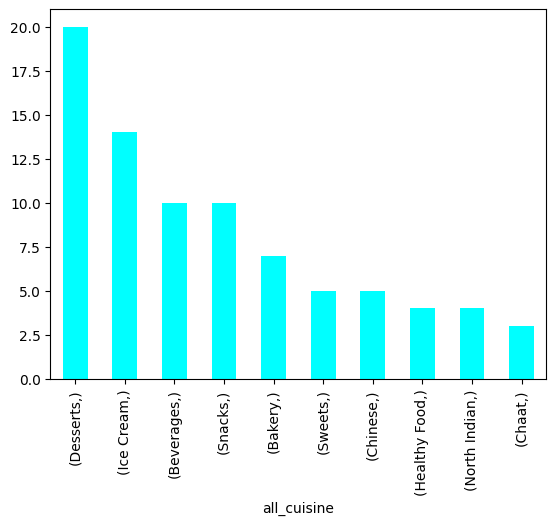

In [54]:
a = []
for i in dblr['Food type'].values:
    try:
        for j in i.split(','):
            a.append(j)
            
    except:
        a.append(i) 
        
popular_cuisine_df_blr = pd.DataFrame({"all_cuisine":a}).value_counts()
popular_cuisine_df_blr.head(10).plot(kind='bar',color='cyan')                             #Most of the restaurants serve desserts

# We see the rating is generally higher and the delivery time is less,let's see if it has some correlation or not

In [55]:
fig = px.scatter(dblr, x='Avg ratings', y="Delivery time",title="Average Rating V/S Delivery Time in Bangalore")
fig.update_xaxes(title_text='Delivery time', title_font_color='white')  
fig.update_yaxes(title_text='Average Rating', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white')
fig.show()     

In [56]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(dblr['Avg ratings'], dblr['Delivery time'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'p-value: {p_value}') 

Pearson correlation coefficient: 0.11406166133280365
p-value: 0.47765004153099727


# MAXIMUM PRICE BY AREA

In [57]:
data_blr_maxprice=data_blr.groupby('Area')['Price'].max().sort_values(ascending=False)
data_blr_maxprice.head()

Area
Vasanth Nagar          2500.0
Brigade Road           2000.0
Ashok Nagar            1600.0
Cunningham Road        1500.0
Sampangi Rama Nagar    1500.0
Name: Price, dtype: float64

# MAXIMUM PRICE BY ADDRESS

In [58]:
data_blr_maxprice=data_blr.groupby('Address')['Price'].max().sort_values(ascending=False)
data_blr_maxprice.head()

Address
Malleshwaram         2500.0
Brigade Road         2000.0
Central Bangalore    1600.0
Off Mg Road          1500.0
Cunningham Road      1500.0
Name: Price, dtype: float64

In [59]:
data_blr[data_blr['Address']=='Malleshwaram']

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
124,5221,Malleshwaram,Bangalore,Food Paradise,326.0,3.9,100,"Mughlai,North Indian,Chinese,Fast Food",Malleshwaram,53
717,30731,Seshadripuram,Bangalore,24/7 - The Lalit Ashok Bangalore,600.0,3.7,20,"American,Asian,Chinese,Continental,North India...",Malleshwaram,55
851,37358,Gandhi Nagar,Bangalore,Hotel Karavali Beach,300.0,2.9,80,Seafood,Malleshwaram,47
1765,123985,Srirampura,Bangalore,Hyderabad Biriyani House,500.0,4.2,500,"Biryani,Chinese,Hyderabadi,Andhra,Fast Food",Malleshwaram,46
2036,168353,Guttahalli,Bangalore,London Dairy,250.0,2.9,80,Ice Cream,Malleshwaram,50
2142,181392,Malleshwaram,Bangalore,The Fast Food,150.0,4.3,50,Indian,Malleshwaram,61
2434,226916,Guttahalli,Bangalore,Chinese Nalapaka,200.0,3.9,50,"Chinese,Indian",Malleshwaram,56
2934,294499,Vasanth Nagar,Bangalore,Itc Windsor - Gourmet Couch,2500.0,4.5,20,"North Indian,Mughlai,Biryani,Grill,Seafood,Keb...",Malleshwaram,55
3084,306701,Seshadripuram,Bangalore,Kalmane Koffees,350.0,2.9,80,Cafe,Malleshwaram,53
3425,331513,Malleshwaram,Bangalore,The Golden Scoop,300.0,2.9,80,Indian,Malleshwaram,61


# MEAN AVERAGE RATING BY AREA

In [60]:
data_blr_avgr=data_blr.groupby('Area')['Avg ratings'].mean().sort_values(ascending=False)
data_blr_avgr.head()

Area
Viveka Nagar        4.6
Central Banglore    4.5
Victoria Layout     4.5
Gandhinagar         4.4
Vv Puram            4.4
Name: Avg ratings, dtype: float64

# DISTRIBUTION OF PRICE IN BANGALORE

In [61]:
fig=px.histogram(data_blr,x=data_blr['Price'])
fig.update_xaxes(title_text='Price of Food', title_font_color='white')  
fig.update_yaxes(title_text='Count', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

#  DISTRIBUTION OF DELIVERY TIME IN BANGALORE

In [62]:
fig=px.histogram(data_blr,x=data_blr['Delivery time'])
fig.update_xaxes(title_text='Delivery Time in Minutes', title_font_color='white')  
fig.update_yaxes(title_text='Count', title_font_color='white') 
fig.update_layout(
    paper_bgcolor='black', 
    plot_bgcolor='black',
    font_color='white'    
)

fig.show()

# FINDING MEAN DELIVERY TIME OF BANGALORE RESTAURANTS

In [63]:
data_blr.describe()         #50 minutes

,ID,Price,Avg ratings,Total ratings,Delivery time
count,946.000000,946.000000,946.000000,946.000000,946.000000
mean,241181.195560,382.524313,3.762896,148.520085,50.529598
std,157812.549078,268.195905,0.650883,220.852912,9.164440
min,211.000000,15.000000,2.500000,20.000000,28.000000
25%,65216.750000,200.000000,2.900000,50.000000,45.000000
50%,287008.500000,300.000000,4.100000,80.000000,52.000000
75%,392492.000000,450.000000,4.300000,100.000000,57.000000
max,462943.000000,2500.000000,5.000000,1000.000000,78.000000


In [64]:
data_blr_maxdt=data_blr[data_blr['Delivery time']>50]          #THERE ARE 519 RESTAURANTS WITH DELIVERY TIME GREATER THAN MEAN DELIVERY TIME

In [65]:
d1=data_blr_maxdt.groupby('Area')['Delivery time'].max().sort_values(ascending=False).head()
d1                                                          #Koramnagala takes 78 mins

Area
Koramangala     78
Rajajinagar     72
Kodihalli       70
Indiranagar     70
Malleshwaram    68
Name: Delivery time, dtype: int64